In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('res.pkl', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('res.pkl', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,ChestWall,MaxDvh,AtMost,3000,1.94
1,D2cm,MaxDose,AtMost,3000,NaN
2,Esophagus,MaxDvh,AtMost,1880,19.97
3,Lung_Total-GTV,MaxDvh,AtMost,1160,56.63
4,Lung_Total-GTV,MaxDvh,AtMost,1240,37.76
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Ribs,MaxDvh,AtMost,3200,2.13
8,Ribs,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,1.99


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,ChestWall,MaxDvh,3000,1.94,NaN,1
1,D2cm,MaxDose,3000,0.00,NaN,1
2,Esophagus,MaxDvh,1880,19.97,NaN,1
3,Lung_Total-GTV,MaxDvh,1160,56.63,NaN,1
4,Lung_Total-GTV,MaxDvh,1240,37.76,NaN,1
5,PTV,MinDvh,4800,95.00,NaN,1
6,PTV,MaxDose,8000,0.00,NaN,1
7,Ribs,MaxDvh,3200,2.13,NaN,1
8,Ribs,MaxDose,4000,0.00,NaN,1
9,SpinalCanal,MaxDvh,1360,1.99,NaN,1


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,ChestWall,MaxDvh,3000.0,3031.657473,1.055249
1,D2cm,MaxDose,3000.0,3417.156250,13.905208
2,Esophagus,MaxDvh,1880.0,625.751346,-66.715354
3,Lung_Total-GTV,MaxDvh,1160.0,16.026486,-98.618406
4,Lung_Total-GTV,MaxDvh,1240.0,29.947504,-97.584879
5,PTV,MinDvh,4800.0,4800.000343,0.000007
6,PTV,MaxDose,8000.0,6268.825195,-21.639685
7,Ribs,MaxDvh,3200.0,3559.550057,11.235939
8,Ribs,MaxDose,4000.0,5117.460938,27.936523
9,SpinalCanal,MaxDvh,1360.0,1435.000679,5.514756


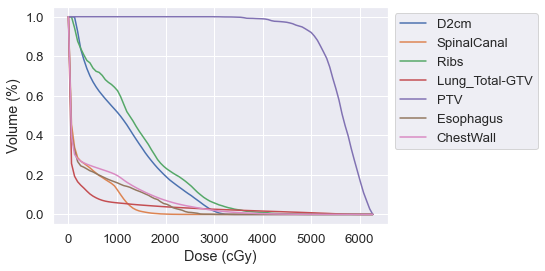

In [7]:
# Dose-volume histograms
result.dvhplot()

In [8]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 224.20, Linear-Quadratic: -907.87
